# K-means 実習<br><small>ハンズオン資料</small>

<p style="text-align:center;font-size:150%;line-height:150%">2015/11/28 機械学習 名古屋 第2回勉強会</p>

## はじめに

この資料は、K-means 法（以降、単に K-means と記述）を用いて、教師なし学習（クラスタリング）を実行するプログラムを作成・実行することを目的とするものです。

## 目標

+ 簡単なサンプルデータを用いて、自力で K-means によるクラスタリングが実装出来るようになる。
+ 自分の組んだ K-means が正しくクラスタリングを実施できているか確認できる（オプション）。
+ K-means の使い道を考える（オプション、もしくは宿題）。

## 環境等

以下の環境を前提とします。

+ Python（必須）（2.7.x / 3.x どちらでもOK）
+ numpy（任意、あると便利）
+ matplotlib（任意ですが、データや学習結果を確認するのに必要）
+ IPython（任意）

## K-means

K-means は、以下の2つのステップを繰り返し行う：

+ クラスタ割り付け
+ 重心移動

### クラスタ割り付け

+ データセットの各点を、どのクラスタに属するか判定して割り付けていく。
+ 具体的には、用意された K個 の「クラスタ重心 (centorids)」のうち、どれに一番「近いか」で判定。

### 重心移動

+ 各クラスタに属する点の集合から、その重心を算出する。
+ 計算した重心を新しい「クラスタ重心 (centroids)」とする（置き換える）。

## K-means のアルゴリズム

0. 前準備：
  1. データを読み込む。
  2. クラスタ数 K を与える。
1. K個 の「クラスタ重心 (centroids)」を乱択する。
2. 以下のループを実施：
  1. クラスタ割り付けステップ
  2. 重心移動ステップ
3. 結果表示

## 1. 前準備

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np

### 1-A. データを読み込む。

※用意したサンプルデータは、1行に小数点付きの数値 (0.0〜20.0) が半角空白区切で2つ、それが100行くらい含まれています。

#### Python 標準関数のみを使用する方法

※入力後のデータは、「リストのリスト」になります。

In [ ]:
data = []
with open('CodeIQ_data.txt', 'r') as f:
    data = [[float(n) for n in line.strip().split()] for line in f.readlines()]

# i番目のデータ（i≧0）を取り出す方法：
# data[i]
# x成分（1列目）・y成分（2列目）をそれぞれ取り出す方法：
# data_x, data_y = map(list, zip(*data))


#### numpy を利用する方法

※入力後のデータは、`numpy.ndarray` になります。

In [2]:
import numpy as np
data = np.loadtxt('CodeIQ_data.txt', delimiter=' ')

# i番目のデータ（i≧0）を取り出す方法：
# data[i] または data[i, :]
# x成分（1列目）・y成分（2列目）をそれぞれ取り出す方法：
# data_x = data[:, 0]
# data_y = data[:, 1]


### 1-B. クラスタ数 K を与える。

<big style="display:block;font-size:300%;font-style:bold;line-height:150%;text-align:center">目視で！</big>

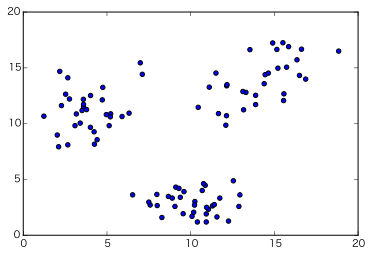

In [4]:
# import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1])

↑だいたい3つくらいのかたまり（クラスタ）がありそうだ。  
⇒ K=3！

## 2. K個 の「クラスタ重心 (centroids)」を乱択する。

いくつか方法はありますが、一般的には、実データから（重複しないように）K個の点を乱択することが多い。

仮想コード（正しく動くように実装してください）：

In [ ]:
def init_centroids(X, K):
    centroids = [] # ← numpy.ndarray でもOK
    # X から K個 のデータをランダムに選択する処理を適切に実装してください。
    # ヒント：Python 標準の random モジュールを利用するか、numpy.random モジュールを利用します。
    return centroids


## 3. ループ

### 3-A. クラスタ割り付けステップ

先ほどの説明の通り：

「用意された K個 の『クラスタ重心 (centorids)』のうち、どれに一番『近いか』で判定」

「近さ（＝**距離**）」は、2乗距離（ユークリッド距離の2乗）で判定すればOK。

例：`x = np.array([12.94, 3.62])`, `c = np.array([11.11, 13.27])` なら、 `(12.94 - 11.11) ** 2 + (3.62 - 13.27) ** 2` を計算する。

仮想コード（正しく動くように実装してください）：

In [ ]:
def find_closest_centroids(X, centroids):
    K = len(centroids)
    idxs = [] # ← numpy.ndarray でもOK、適当な値で初期化するのもOK
    for i, x in enumerate(X):
        pass
        # ここを適切に実装してください。
        # 方針：X の点 x が centroids のどれに『近いか』を判定し、idxs[i] にそのインデックスを格納する。
        # 計算方法は先述の例を参照。
    
    return idxs


### 3-B. 重心移動ステップ

先ほどの説明の通り：

+ 各クラスタに属する点の集合から、その重心を算出する。
+ 計算した重心を新しい「クラスタ重心 (centroids)」とする（置き換える）。

仮想コード（正しく動くように実装してください）：

In [ ]:
def compute_centroids(X, idxs, K):
    m, n = "X の行数（＝データ数）", "X の列数（＝次元数、今回の場合 2）" # 適切に実装してください。
    centroids = [] # ← numpy.ndarray でもOK
    # ここを適切に実装してください。
    # ヒント1：numpy.ndarray を使用している場合、m, n の取得は `np.shape` 関数が利用できます。
    # ヒント2：インデックス（0〜K-1）ごとにデータを抽出して、平均を取ればOK。

    return centroids


### 3-C. ループ実施

コード例（最初の行の `m, n` だけ実装すれば、他は今までの関数が正しく実装されていればこのままでも動きます）：

In [ ]:
def run_kmeans(X, initial_centroids, max_iters=10):
    m, n = "X の行数（＝データ数）", "X の列数（＝次元数、今回の場合 2）" # 適切に実装してください。
    K = len(initial_centroids)
    centroids = initial_centroids
    prev_centroids = centroids
    idxs = []

    for _ in range(max_iters):
        idxs = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idxs, K)
        # これだけでもOKですが、必要に応じて、ここに「終了条件」を入れてもOK。

        prev_centroids = centroids

    return centroids, idxs


#### 補足：「終了条件」について

1. `prev_centroids` と `centroids` が一致した場合  
… クラスタ分割が完全に安定した（＝移動が1つもない）ので、これ以上ループする必要は無い⇒終了してOK。  
　（データ数が十分に少ないときは、この方法を使用してもOK）
2. `prev_centroids` と `centroids` の差が十分に小さい場合  
… クラスタ分割がある程度安定してきた（＝移動がほとんどない）⇒終了。  
　（データ数がある程度多くてもOK、閾値を適切に設定する必要あり）

### 4. 結果表示

#### 4-1. matplotlib で結果プロット例1（numpy 利用）

In [5]:
def disp_result(X, idxs):
    a_idxs = np.array(idxs)
    data_0 = X[a_idxs == 0, :]
    data_1 = X[a_idxs == 1, :]
    data_2 = X[a_idxs == 2, :]
    
    plt.plot(data_0[:,0], data_0[:,1], "c.")
    plt.plot(data_1[:,0], data_1[:,1], "m.")
    plt.plot(data_2[:,0], data_2[:,1], "y.")
    return plt.show()


※ 表示例：

In [6]:
sample_idxs = [0,1,2,0,0,1,0,0,1,2,1,2,1,1,0,0,2,0,1,2,0,0,2,1,2,1,1,1,2,2,1,2,2,0,0,0,0,0,1,2,0,1,0,2,1,1,0,2,0,2,1,2,1,0,0,1,0,2,1,2,0,0,1,2,2,1,0,0,2,0,2,0,1,0,2,1,0,1,2,2,2,2,2,1,1,1,0,1,0,0,2,1,1,0,2,1]

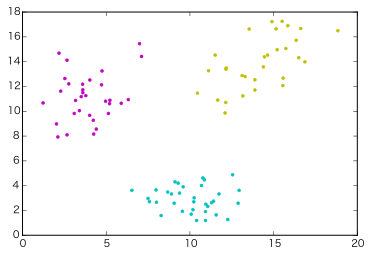

In [7]:
disp_result(data, sample_idxs)

#### 4-2. matplotlib で結果プロット例2（numpy 非利用）

In [ ]:
def disp_result(X, idxs):
    data_0 = [v for i, v in enumerate(X) if idxs[i] == 0]
    data_1 = [v for i, v in enumerate(X) if idxs[i] == 1]
    data_2 = [v for i, v in enumerate(X) if idxs[i] == 2]
    
    data_0x, data_0y = map(list, zip(*data_0))
    data_1x, data_1y = map(list, zip(*data_1))
    data_2x, data_2y = map(list, zip(*data_2))

    plt.plot(data_0x, data_0y, "c.")
    plt.plot(data_1x, data_1y, "m.")
    plt.plot(data_2x, data_2y, "y.")
    return plot.show()


※ 表示例は先ほどの例を参照。

#### 4-3. データをまとめて標準出力に出力例

※ matplotlib が使用できない場合はこの方法で結果を出力。

In [ ]:
def disp_result(X, idxs):
    for i, x in enumerate(X):
        print("%.2f %.2f %d" % (x[0], x[1], idxs[i]))


### 5. K-means 実行

In [ ]:
def run(X, K):
    initial_centroids = init_centroids(X, K)
    centroids, idxs = run_kmeans(X, initial_centroids)
    disp_result(X, idxs)

run(data, 3)

以上を1つのファイル（`kmeans.py`）にまとめて、コマンドラインから `python kmeans.py` を実行。

## 目的関数と最適化

※ここからはオプションです。時間に余裕がある場合はこの先に進んでください。

### 目的関数

+ 最適化する対象となる関数。
+ K-means では、目的関数は「各点と、その属するクラスタ重心との距離の二乗の平均を求める関数」、最適化は「目的関数の値が最小となるようにパラメータを選ぶこと」。

$c^{(i)}$ … i番目 のデータの属するクラスタ番号（＝`idxs[i-1]`）  
$\mu_k$ … k番目 のクラスタ（1≦k≦K）のクラスタ重心（＝`centroids[k-1]`）  
$\mu_{c^{(i)}}$ … i番目 のデータの属するクラスタのクラスタ重心（＝`centroids[idxs[i-1]]`）

$$
J(c^{(1)},\dots,c^{(m)},\mu_1,\dots,\mu_K) = \frac{1}{m} \sum_{i=1}^m \left\| x^{(i)} - \mu_{c^{(i)}} \right\|^2\\
\min_{c^{(1)},\dots,c^{(m)},\mu_1,\dots,\mu_K} J(c^{(1)},\dots,c^{(m)},\mu_1,\dots,\mu_K)
$$

↑のJ（目的関数）を、イテレーションごとに得られる idxs と centroids を利用して計算し、それを plot すると良い。

In [8]:
def cost(X, centroids, idxs):
    # # 例1：numpy を使用していない場合（X や centroids が二次元の list の場合）
    # m = len(X)
    # n = len(X[0])
    # return sum(sum((X[j][i] - centroids[idxs[j]][i]) ** 2 for i in range(n)) for j in range(m)) / m

    # 例2：numpy を使用している場合（X や centroids が二次元の numpy.ndarray の場合）
    return np.mean([sum(n**2 for n in (X[i] - centroids[idxs[i]])) for i in range(len(X))])


### 学習曲線

+ イテレーションの回数を横軸、それぞれの目的関数の値を縦軸にとって、イテレーションごとにその値をプロットしたグラフ。

In [ ]:
def run_stepwise(X, K):
    m = len(X)
    initial_centroids = init_centroids(X, K)
    initial_idxs = [0 for _ in range(m)]
    
    centroids = initial_centroids
    idxs = initial_idxs
    costs = [cost(X, centroids, idxs)]

    prev_centroids = centroids
    for _ in range(10):
        centroids, idxs = run_kmeans(X, centroids, max_iters=1)
        costs.append(cost(X, centroids, idxs))

        # if centroids == prev_centroids:
        if (centroids == prev_centroids).all():
            break

        prev_centroids = centroids

    plt.plot(range(len(costs)), costs, label='Learning Curve')
    plt.xlabel("Iterations")
    plt.ylabel("Costs")
    return plt.show()


表示例：

<img src="./LearningCurveSample.png" width="800">